In [1]:
# 라이브러리 불러오기

from keras.models import load_model
import tensorflow as tf

import matplotlib.pyplot as plt
import os
import shutil
import glob
import cv2

import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
import random

import time

In [2]:
# 저장한 학습시킨 모델 불러오기

model = load_model('./학습함수/CNN_epoch_100_batch_32.h5')

In [3]:
# 경로 지정하기

# 파일이 있는 경로
test_dir = '../data/petfinder-pawpularity-score/train'

# test set 1000장(cat:500/dog:500)
print(f'the number of test set : {len(os.listdir(test_dir))}')

the number of test set : 9912


In [4]:
PF_dir = os.listdir(test_dir)
PF_df = pd.DataFrame({
    'f_name':PF_dir
})
PF_samples = PF_df.shape[0]

PF_test_gen = ImageDataGenerator(rescale=1./255)
PF_test_generator = PF_test_gen.flow_from_dataframe(PF_df,
                                             test_dir,
                                             x_col = 'f_name',
                                             y_col=None,
                                             target_size=(150,150),
                                             batch_size=32,
                                             shuffle=False,
                                             class_mode=None)

Found 9912 validated image filenames.


In [6]:
# 예측하기

start = time.time()

predict = model.predict_generator(PF_test_generator, steps=np.ceil(PF_samples/32))
predict = pd.DataFrame(predict)

PF_df['predicted'] = predict

# 분류하기
categoris = []
j=0
for i in PF_df['predicted']:
    if PF_df['predicted'][j] < 0.5:
        categoris.append('cat')
        j+=1
    else:
        categoris.append('dog')
        j+=1
        
PF_df['category'] = categoris
print('time :', time.time()-start)
PF_df

time : 476.5883049964905


,f_name,predicted,category
0,0007de18844b0dbbb5e1f607da0606e0.jpg,9.926274e-01,dog
1,0009c66b9439883ba2750fb825e1d7db.jpg,1.215125e-01,cat
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,3.575692e-02,cat
3,0018df346ac9c1d8413cfcc888ca8246.jpg,1.000000e+00,dog
4,001dc955e10590d3ca4673f034feeef2.jpg,1.537398e-06,cat
...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57.jpg,9.919400e-01,dog
9908,ffcc8532d76436fc79e50eb2e5238e45.jpg,3.043402e-01,cat
9909,ffdf2e8673a1da6fb80342fa3b119a20.jpg,1.435876e-04,cat
9910,fff19e2ce11718548fa1c5d039a5192a.jpg,5.449967e-01,dog


In [12]:
476.5883049964905/60

7.943138416608175

## 시각화

In [8]:
%matplotlib inline
import seaborn as sns

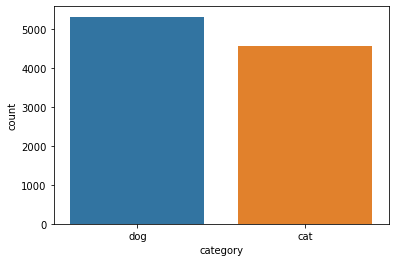

In [11]:
sns.countplot(x='category', data = PF_df)
plt.show()

In [16]:
dog = PF_df['category'].loc[PF_df['category']=='dog'].count()
cat = PF_df['category'].loc[PF_df['category']=='cat'].count()

print('dog_count : ', dog)
print('cat_count : ', cat)
print('======================================')
print(f'dog_percentage : {dog/len(PF_df)*100: .2f}')
print(f'cat_percentage : {cat/len(PF_df)*100: .2f}')

dog_count :  5327
cat_count :  4585
dog_percentage :  53.74
cat_percentage :  46.26


### 데이터 합치기

In [17]:
train = pd.read_csv('../data/petfinder-pawpularity-score/train.csv')

In [18]:
train

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [41]:
# PF_df.rename({'f_name':'Id'}, axis=1, inplace=True)
type(PF_df['Id'][100].split('.')[0])

f_name = []
for i in range(len(PF_df)):
    f_name.append(PF_df['Id'][i].split('.')[0])
    
f_name

['0007de18844b0dbbb5e1f607da0606e0',
 '0009c66b9439883ba2750fb825e1d7db',
 '0013fd999caf9a3efe1352ca1b0d937e',
 '0018df346ac9c1d8413cfcc888ca8246',
 '001dc955e10590d3ca4673f034feeef2',
 '001dd4f6fafb890610b1635f967ea081',
 '0023b8a3abc93c712edd6120867deb53',
 '0031d6a9ef7340f898c3e05f92c7bb04',
 '0042bc5bada6d1cf8951f8f9f0d399fa',
 '0049cb81313c94fa007286e9039af910',
 '005017716086b8d5e118dd9fe26459b1',
 '00524dbf2637a80cbc80f70d3ff59616',
 '00630b1262efe301cb15a3b2022ba744',
 '006483b96ca9c09b7afed3e3d3af539d',
 '00655425c10d4c082dd7eeb97fa4fb17',
 '0067aaaa500b530c76b9c91af34b4cb8',
 '006cda7fec46a527f9f627f4722a2304',
 '006fe962f5f7e2c5f527b2e27e28ed6d',
 '0075ec6503412f21cf65ac5f43d80440',
 '00768659c1c90409f81dcdecbd270513',
 '007c6ea0ccfca08d4736e5f459ed274a',
 '00838b02764e8d37edde39ed18693427',
 '0084a12f432ef6e47e8b9ff04d8a32b4',
 '0085bfb9a7ebfd776cb804d8b456bb05',
 '009367718f506d87cd898ed0310a2392',
 '0095f81bab3b68a4f70e99f0fcec7b06',
 '00a1ae8867e0bb89f061679e1cf29e80',
 

In [43]:
PF_df['Id'] = f_name
PF_df

,Id,predicted,category
0,0007de18844b0dbbb5e1f607da0606e0,9.926274e-01,dog
1,0009c66b9439883ba2750fb825e1d7db,1.215125e-01,cat
2,0013fd999caf9a3efe1352ca1b0d937e,3.575692e-02,cat
3,0018df346ac9c1d8413cfcc888ca8246,1.000000e+00,dog
4,001dc955e10590d3ca4673f034feeef2,1.537398e-06,cat
...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,9.919400e-01,dog
9908,ffcc8532d76436fc79e50eb2e5238e45,3.043402e-01,cat
9909,ffdf2e8673a1da6fb80342fa3b119a20,1.435876e-04,cat
9910,fff19e2ce11718548fa1c5d039a5192a,5.449967e-01,dog


In [26]:
df = pd.merge(train, PF_df, on='Id', how='right')
df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,predicted,category
0,0007de18844b0dbbb5e1f607da0606e0.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.926274e-01,dog
1,0009c66b9439883ba2750fb825e1d7db.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.215125e-01,cat
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.575692e-02,cat
3,0018df346ac9c1d8413cfcc888ca8246.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,dog
4,001dc955e10590d3ca4673f034feeef2.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.537398e-06,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.919400e-01,dog
9908,ffcc8532d76436fc79e50eb2e5238e45.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.043402e-01,cat
9909,ffdf2e8673a1da6fb80342fa3b119a20.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435876e-04,cat
9910,fff19e2ce11718548fa1c5d039a5192a.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.449967e-01,dog


In [45]:
df1 = pd.merge(train, PF_df, on='Id', how='right')
df1

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity,predicted,category
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63,9.926274e-01,dog
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42,1.215125e-01,cat
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28,3.575692e-02,cat
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15,1.000000e+00,dog
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72,1.537398e-06,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15,9.919400e-01,dog
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70,3.043402e-01,cat
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20,1.435876e-04,cat
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20,5.449967e-01,dog


In [46]:
df1.to_csv('train_add_category.csv')